<a href="https://colab.research.google.com/github/panupong-kha/ML/blob/main/house_price_predict/house_price_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pickle
from google.colab import files


In [24]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_column',None)
url = ("https://raw.githubusercontent.com/panupong-kha/ML/main/house_price_predict/Housing.csv")
df = pd.read_csv(url)
df = df.drop_duplicates()
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 59.6+ KB


In [26]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [27]:
df2 = df.copy()

In [28]:
df2['mainroad'] = df2['mainroad'].map({'yes': 1, 'no': 0}).fillna(df2['mainroad']).fillna(df2['mainroad'])
df2['guestroom'] = df2['guestroom'].map({'yes': 1, 'no': 0}).fillna(df2['guestroom'])
df2['basement'] = df2['basement'].map({'yes': 1, 'no': 0}).fillna(df2['basement'])
df2['airconditioning'] = df2['airconditioning'].map({'yes': 1, 'no': 0}).fillna(df2['airconditioning'])
df2['hotwaterheating'] = df2['hotwaterheating'].map({'yes': 1, 'no': 0}).fillna(df2['hotwaterheating'])
df2['prefarea'] = df2['prefarea'].map({'yes': 1, 'no': 0}).fillna(df2['prefarea'])
df2['furnishingstatus'] = df2['furnishingstatus'].map({'furnished': 2, 'semi-furnished': 1,'unfurnished':0}).fillna(df2['furnishingstatus'])
df2.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


In [29]:
corr = df2.corr()
corr.sort_values(by='price',ascending=False)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.384394,0.329777,0.304721
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,0.171445
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,0.143559
airconditioning,0.452954,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,0.150477
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,0.104672
parking,0.384394,0.352980,0.139270,0.177496,0.045547,0.204433,0.037466,0.051497,0.067864,0.159173,1.000000,0.091627,0.177539
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,0.123244
prefarea,0.329777,0.234779,0.079023,0.063472,0.044425,0.199876,0.160897,0.228083,-0.059411,0.117382,0.091627,1.000000,0.107686
furnishingstatus,0.304721,0.171445,0.123244,0.143559,0.104672,0.156726,0.118328,0.112831,0.031628,0.150477,0.177539,0.107686,1.000000
mainroad,0.296898,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,0.156726


theta0 :83094.90058513917
theta 1 to n :[2.40465680e+02 1.03416503e+06 8.44571599e+05 4.13684256e+05
 3.31529533e+05 1.47605185e+05 7.75630297e+05 2.91660166e+05]
R-squared: 0.8020
Mean Squared Error: 668,868,831,928.8262


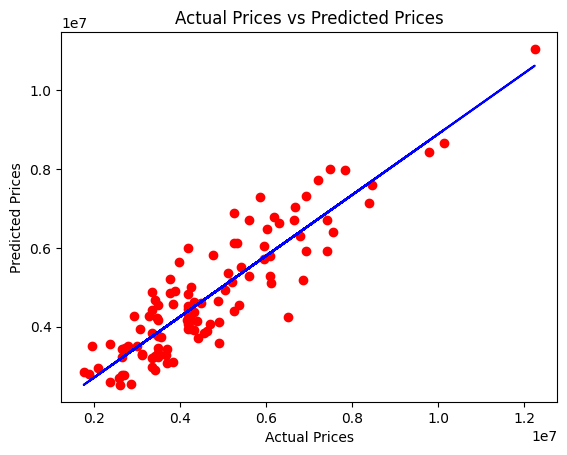

In [30]:
X = df2[['area','bathrooms','airconditioning','stories','parking','bedrooms','prefarea','furnishingstatus']]
y = df2['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=497)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
# c = pd.DataFrame({'Actual':y_test,'Predict':y_pred})
# c.head()
print(f'theta0 :{model.intercept_}')
print(f'theta 1 to n :{model.coef_}')
r2 = model.score(X_test, y_test)
print(f'R-squared: {r2:,.4f}')
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:,.4f}")



plt.scatter(y_test, y_pred, color='red')
m, b = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, m*y_test + b, color='blue')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [31]:
"""Deploy"""
pickle.dump(model, open('ml_6610422028.sav','wb') )
files.download('ml_6610422028.sav')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Polynomial regression degree = 2
R-squared: 0.6561
Mean Squared Error: 1,161,979,775,036.4907


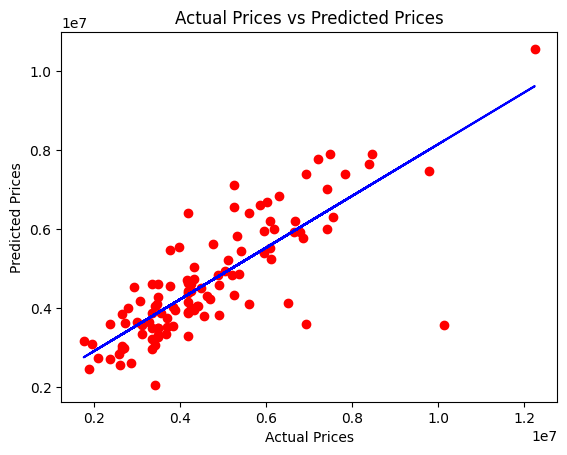

In [33]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_reg.fit_transform(X_train)

pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)

X_test_poly = poly_reg.fit_transform(X_test)
result = pol_reg.predict(X_test_poly)

print('Polynomial regression degree = 2')
r2 = pol_reg.score(X_test_poly, y_test)
print(f'R-squared: {r2:,.4f}')
mse = mean_squared_error(y_test, result)
print(f"Mean Squared Error: {mse:,.4f}")

plt.scatter(y_test, result, color='red')
m, b = np.polyfit(y_test, result, 1)
plt.plot(y_test, m*y_test + b, color='blue')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()